# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform cross validation
from sklearn.model_selection import cross_val_score

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

from sklearn.metrics import r2_score

# 2. Collect and load data

In [5]:
df = pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [6]:
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [7]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

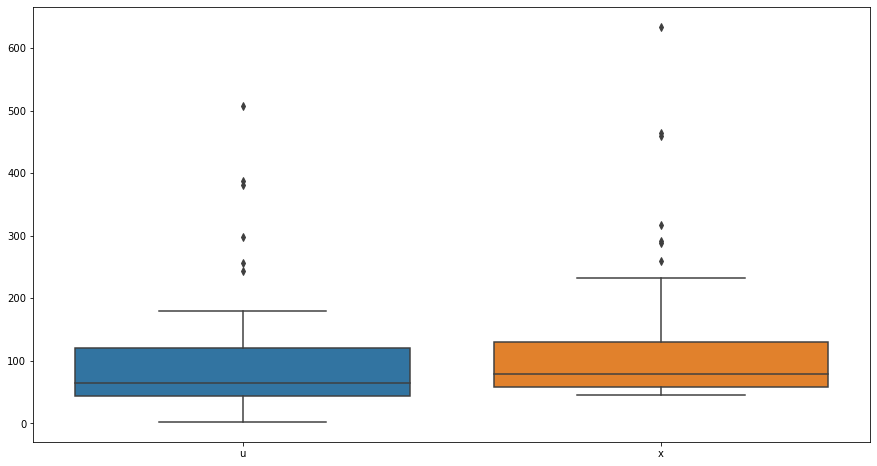

In [11]:
sns.boxplot(data = df)
plt.show()

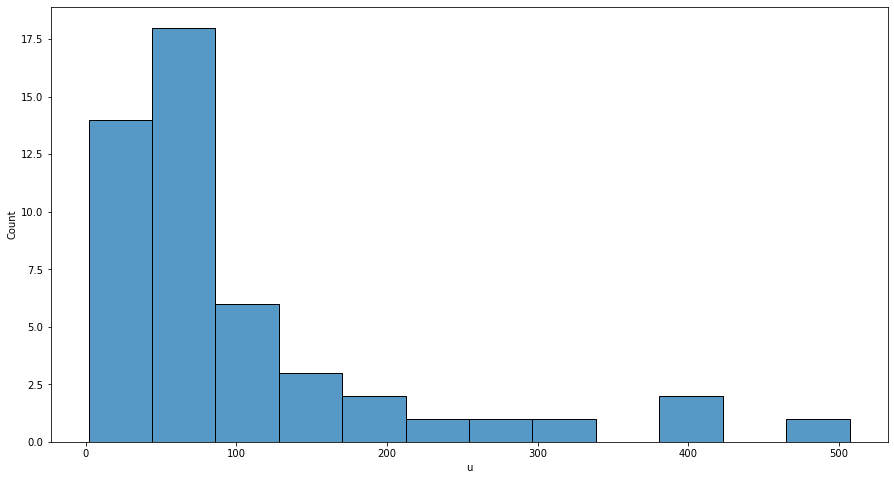

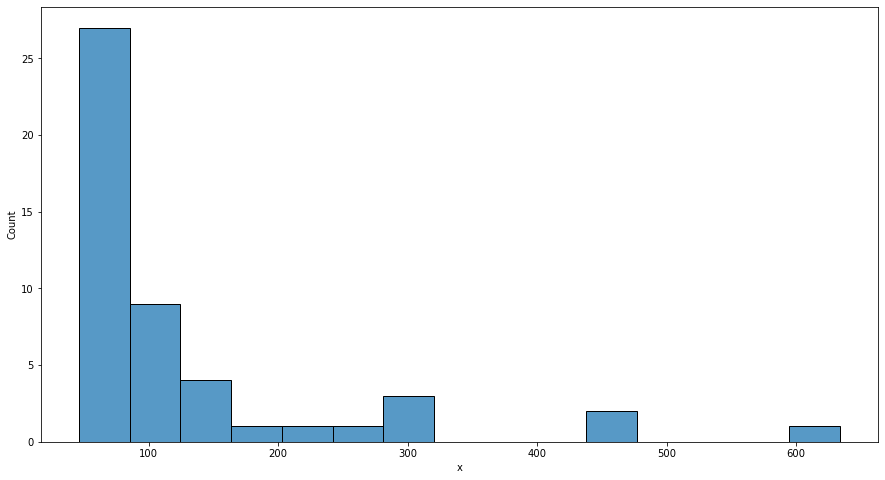

In [18]:
sns.histplot(data = df, x = 'u')
plt.show()
sns.histplot(data = df, x = 'x' )
plt.show()

In [22]:
print('Variance of u is ',df['u'].var())
print('Standard deviation of u is ',df['u'].std())
print('Variance of x is ',df['x'].var())
print('Standard deviation of x is ',df['x'].std())

Variance of u is  10900.416666666662
Standard deviation of u is  104.40506054146351
Variance of x is  15158.832482993197
Standard deviation of x is  123.12121053252034


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

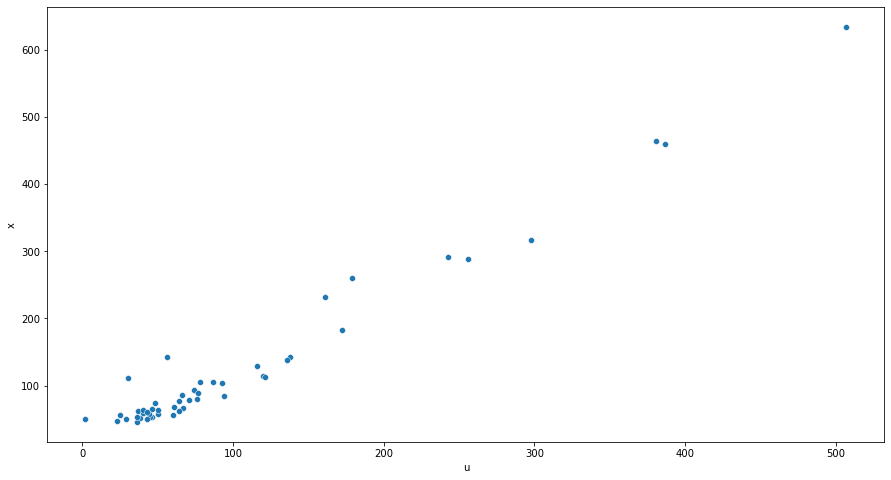

In [23]:
sns.scatterplot(data = df, x = 'u', y = 'x')
plt.show()

In [29]:
pd.crosstab(df['u'], df['x'])

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [30]:
df.shape

(49, 2)

In [45]:
X = df[['u']]
y = df['x']

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [46]:
df.isna().sum()

u    0
x    0
dtype: int64

In [47]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39, 1)
(10, 1)
(39,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [51]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('The b0 is', linreg.intercept_)
print('The b1 is', linreg.coef_)

The b0 is 9.718455322828262
The b1 is [1.15945123]


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [55]:
y_test_pred = linreg.predict(X_test)
print('The RMSE is',np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('The R-squared value is',r2_score(y_test,y_test_pred))

The RMSE is 23.385235190249123
The R-squared value is 0.9181922560396981


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [57]:
linreg.score(X_train, y_train)

0.9682175540860046

In [58]:
linreg.score(X_test, y_test)

0.9181922560396981